# Importing libraries

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Exploratory Data Analysis

In [87]:
data = pd.read_csv("Data/Concrete_Data_Yeh.csv")

In [88]:
len(data)

1030

In [89]:
# We have *8 input features -
# except age feature all other feature's unit is Kg/m^3
data.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [90]:
data.isnull().sum()

cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
csMPa               0
dtype: int64

In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [92]:
data.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


# Feature Correlation

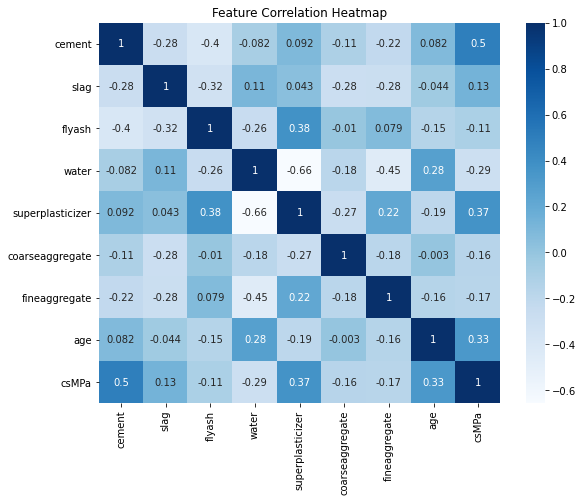

In [93]:
# To find relation between compressive strength and other features
# positive and high correlation means features are directly propotional and highly dependent
# negative correlation -- features are inversely propotional
corr = data.corr()

plt.figure(figsize=(9,7))
sns.heatmap(corr, annot=True, cmap='Blues') #annot -- an array of same data which is used to annotate the heatmap
#b, t = plt.ylim() # ylim- function that used to y-limits of current axes
#plt.ylim(b+0.5, t-0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# our observation-
# 1) cement is highly correlated with strength (case for more strength)
# 2) after cement age and superplasticizer are strongly correlated
# 3) super plasticizer have negative correlation with water.

In [ ]:
# for checking distribution of compressive strength -- we use distplot
ax = sns.distplot(data.csMPa)
ax.set_title("Compressive Strength Distribution")

# Visualizing Correlation using Scatter Plot

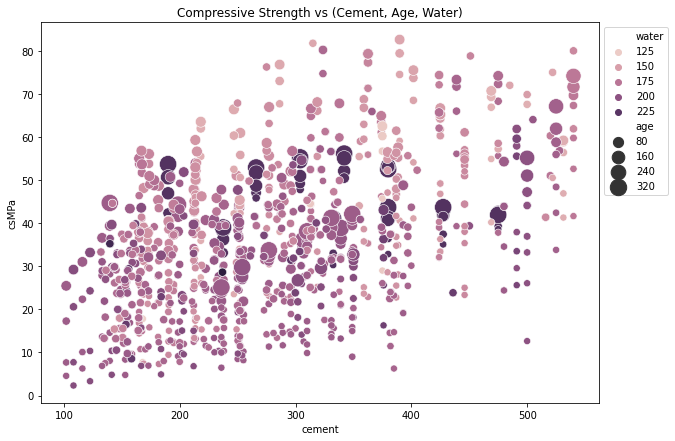

In [82]:
# Scatter plots show how much one variable is affected by another or correlation
# and we can also see other features ,how they are related

# hue-- grouping variable that will produce points with colors
# size-- grouping variable that will produce points with size

fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(y="csMPa", x="cement", hue="water", size="age", data=data, ax=ax, sizes=(50, 300) )
ax.set_title("Compressive Strength vs (Cement, Age, Water)")
ax.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()


#Observations-
# Compressive strength increases with amount of cement
# Compressive strength increases with age
# Cement with low age requires more cement for higher strength
# The older the cement is the more water it requires
# Concrete strength increases when less water is used in preparing it

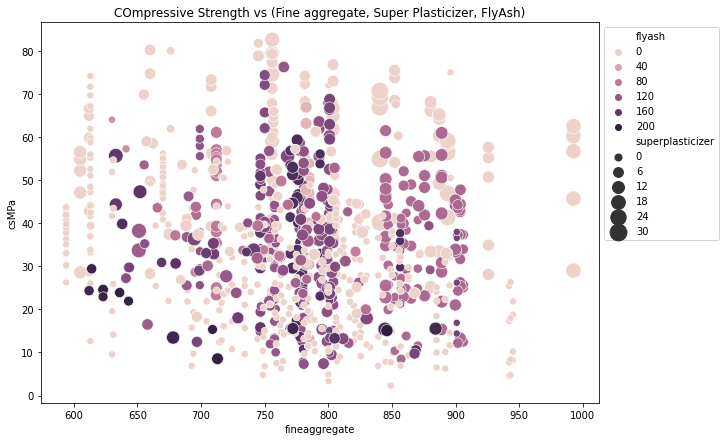

In [83]:
fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(y="csMPa", x="fineaggregate", hue="flyash", size="superplasticizer", 
                data=data, ax=ax, sizes=(50, 300))
ax.set_title("COmpressive Strength vs (Fine aggregate, Super Plasticizer, FlyAsh)")
ax.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()

# Observations
# As Flyash increases the strength decreases
# Strength increases with Super plasticize

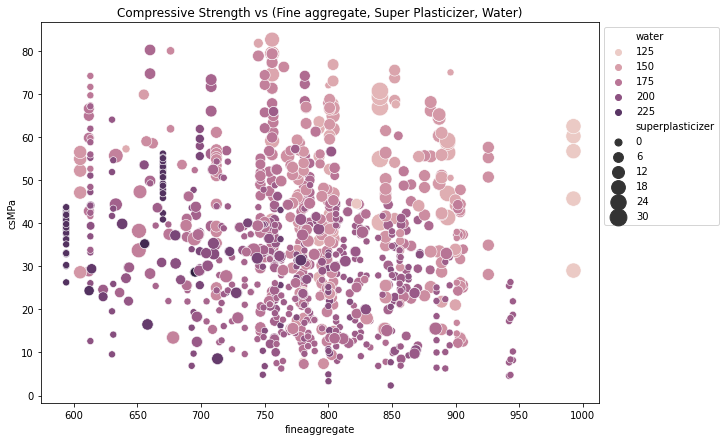

In [84]:
fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(y="csMPa", x="fineaggregate", hue="water", size="superplasticizer", 
                data=data, ax=ax, sizes=(50, 300))
ax.set_title("Compressive Strength vs (Fine aggregate, Super Plasticizer, Water)")
ax.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()

#Observations-
# Strength decreases with increase in water, strength increases with increase in Super plasticizer (already from above plots)
# More Fine aggregate is used when less water, more Super plasticizer is used

# Spillting Data for training and testing

In [94]:
X = data.iloc[:,:-1]         # Features - All columns but last
y = data.iloc[:,-1]          # Target - Last Column

AttributeError: 'DataFrame' object has no attribute 'reshape'

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Standarizing the training data

In [51]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Model Selection--
###  1) Strating with basic regression models like- linear regression , L1 , L2
### 2) After that we will use Tree based models - Decision tree , Random Forest , XGBoost
### 3) At last we will use Artificial Neural Network

In [52]:
# Importing models
from sklearn.linear_model import LinearRegression, Lasso, Ridge

# Linear Regression
lr = LinearRegression()
# Lasso Regression
lasso = Lasso()
# Ridge Regression
ridge = Ridge()

# Fitting models on Training data 
lr.fit(X_train, y_train)
lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)

# Making predictions on Test data
y_pred_lr = lr.predict(X_test)
y_pred_lasso = lasso.predict(X_test)
y_pred_ridge = ridge.predict(X_test)

# Evaluation of our model - using Evaluation Matrices

In [53]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("Model\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""LinearRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_lr)),mean_squared_error(y_test, y_pred_lr),
            mean_absolute_error(y_test, y_pred_lr), r2_score(y_test, y_pred_lr)))
print("""LassoRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_lasso)),mean_squared_error(y_test, y_pred_lasso),
            mean_absolute_error(y_test, y_pred_lasso), r2_score(y_test, y_pred_lasso)))
print("""RidgeRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_ridge)),mean_squared_error(y_test, y_pred_ridge),
            mean_absolute_error(y_test, y_pred_ridge), r2_score(y_test, y_pred_ridge)))

Model			 RMSE 		 MSE 		 MAE 		 R2
LinearRegression 	 10.28 		 105.76 	8.23 		0.57
LassoRegression 	 10.68 		 114.11 	8.65 		0.54
RidgeRegression 	 10.29 		 105.84 	8.24 		0.57


# Feature coefficient or Importance of feature

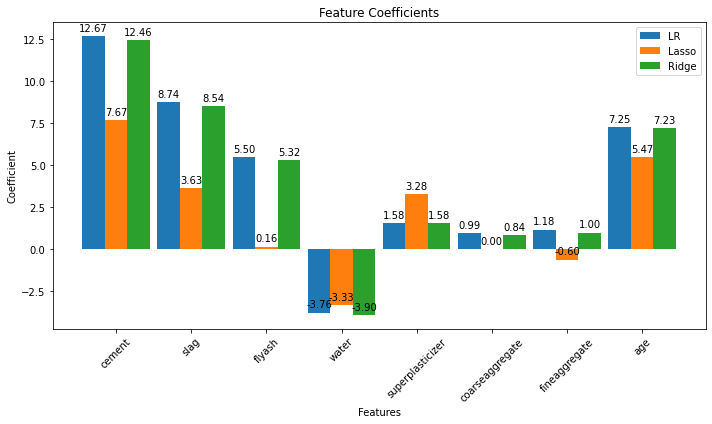

In [54]:
coeff_lr = lr.coef_
coeff_lasso = lasso.coef_
coeff_ridge = ridge.coef_

labels = data.columns[:-1]

x = np.arange(len(labels)) 
width = 0.3

fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(x - 2*(width/2), coeff_lr, width, label='LR')
rects2 = ax.bar(x, coeff_lasso, width, label='Lasso')
rects3 = ax.bar(x + 2*(width/2), coeff_ridge, width, label='Ridge')

ax.set_ylabel('Coefficient')
ax.set_xlabel('Features')
ax.set_title('Feature Coefficients')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
plt.show()

# Plotting Between True value and Predicted Value

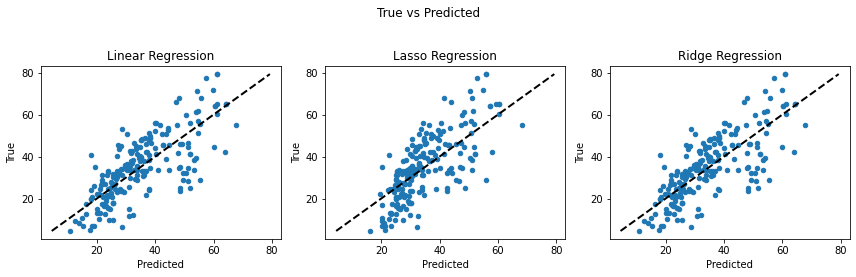

In [55]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,4))

ax1.scatter(y_pred_lr, y_test, s=20)
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax1.set_ylabel("True")
ax1.set_xlabel("Predicted")
ax1.set_title("Linear Regression")

ax2.scatter(y_pred_lasso, y_test, s=20)
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax2.set_ylabel("True")
ax2.set_xlabel("Predicted")
ax2.set_title("Lasso Regression")

ax3.scatter(y_pred_ridge, y_test, s=20)
ax3.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax3.set_ylabel("True")
ax3.set_xlabel("Predicted")
ax3.set_title("Ridge Regression")

fig.suptitle("True vs Predicted")
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

# Decision Tree

Model				 RMSE 		 MSE 		 MAE 		 R2
Decision Tree Regressor 	 7.46 		 55.66 		4.55 		0.77


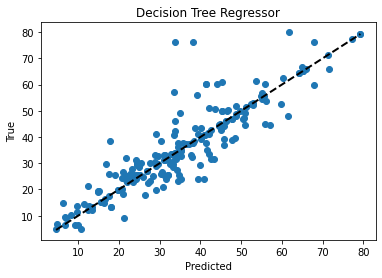

In [56]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()

dtr.fit(X_train, y_train)

y_pred_dtr = dtr.predict(X_test)

print("Model\t\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""Decision Tree Regressor \t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_dtr)),mean_squared_error(y_test, y_pred_dtr),
            mean_absolute_error(y_test, y_pred_dtr), r2_score(y_test, y_pred_dtr)))

plt.scatter(y_test, y_pred_dtr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Decision Tree Regressor")
plt.show()

# Random Forest without Hyperparameter Tuning 

Model				 RMSE 		 MSE 		 MAE 		 R2
Random Forest Regressor 	 5.09 		 25.93 		3.49 		0.89


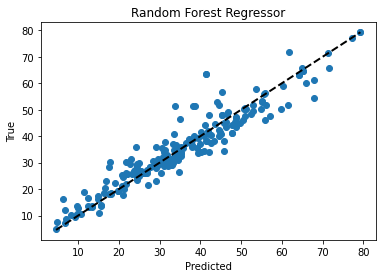

In [57]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=100)

rfr.fit(X_train, y_train)

y_pred_rfr = rfr.predict(X_test)

print("Model\t\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""Random Forest Regressor \t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_rfr)),mean_squared_error(y_test, y_pred_rfr),
            mean_absolute_error(y_test, y_pred_rfr), r2_score(y_test, y_pred_rfr)))

plt.scatter(y_test, y_pred_rfr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Random Forest Regressor")
plt.show()

# XGBoost with its hyperparmeter tuning

In [58]:
import xgboost
classifier =xgboost.XGBRegressor()
classifier.fit(X_train , y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [59]:
n_estimators = [ 100 , 500 , 900 , 1100 , 1500]
max_depth = [ 2, 3, 5 , 10 , 15]
booster = ['gbtree' ,'gblinear']
learning_rate = [0.05, 0.1 , 0.15, 0.20]
min_child_weight = [1,2,3,4]
base_score =[0.25 , 0.5, 0.75 , 1]



hyperparameter_grid = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth,
    'booster' : booster,
    'learning_rate': learning_rate,
    'base_score': base_score,
    'min_child_weight': min_child_weight
}

In [60]:
from sklearn.model_selection import RandomizedSearchCV

In [61]:
random_cv = RandomizedSearchCV(classifier,
                               hyperparameter_grid,
                              cv=5 , n_iter = 50 , 
                              scoring = 'neg_mean_absolute_error', n_jobs = 4,
                              verbose = 5 ,
                              return_train_score = True , random_state = 42)

In [62]:
random_cv.fit(X_train , y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   10.3s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:   33.8s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  1.0min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:  1.6min finished


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          gpu_id=-1, importance_type='gain',
                                          interaction_constraints='',
                                          learning_rate=0.300000012,
                                          max_delta_step=0, max_depth=6,
                                          min_child_weight=1, missing=nan,
                                          monotone_constraints='()',
                                          n_estimators=100, n_jobs=0,
                                          num_par...
                                          validate_parameters=1,
                                          verbosity=None),
                   n_it

In [63]:
random_cv.best_estimator_

XGBRegressor(base_score=1, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=3,
             min_child_weight=4, missing=nan, monotone_constraints='()',
             n_estimators=1100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [64]:
 classifier =xgboost.XGBRegressor(base_score=1, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=3,
             min_child_weight=4, missing=None, monotone_constraints='()',
             n_estimators=1100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [65]:
classifier.fit(X_train , y_train)

XGBRegressor(base_score=1, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=3,
             min_child_weight=4, missing=None, monotone_constraints='()',
             n_estimators=1100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [66]:
y_pred_rfr = classifier.predict(X_test)

In [67]:
print("Model\t\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""Random Forest Regressor \t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_rfr)),mean_squared_error(y_test, y_pred_rfr),
            mean_absolute_error(y_test, y_pred_rfr), r2_score(y_test, y_pred_rfr)))

Model				 RMSE 		 MSE 		 MAE 		 R2
Random Forest Regressor 	 4.56 		 20.75 		2.84 		0.92


# Hyper parameter tuning of Random Forest

In [68]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()

rfr.fit(X_train, y_train)

RandomForestRegressor()

In [69]:
n_estimators = [ 120 , 300 , 500 , 800 , 1200]
max_depth = [ 5, 8, 15 , 25 , 30 ,None]
min_samples_split = [1,2,5,10,15,100]
min_samples_leaf = [1,2,5,10]
max_features =['log2' ,'sqrt' ,None]



hyperparameter_grid = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth,
     'max_features':max_features,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

In [70]:
random_cvr = RandomizedSearchCV(rfr,
                               hyperparameter_grid,
                              cv=5 , n_iter = 50 , 
                              scoring = 'neg_mean_absolute_error', n_jobs = 4,
                              verbose = 5 ,
                              return_train_score = True , random_state = 42)

In [71]:
random_cvr.fit(X_train , y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   20.6s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:   56.3s


KeyboardInterrupt: 

In [36]:
random_cvr.best_estimator_

RandomForestRegressor(max_depth=15, max_features=None, n_estimators=120)

In [37]:
rfr = RandomForestRegressor(max_depth=15, max_features=None, n_estimators=120)


In [38]:
rfr.fit(X_train , y_train)

RandomForestRegressor(max_depth=15, max_features=None, n_estimators=120)

In [39]:
y_pred_rf = rfr.predict(X_test)

In [40]:
print("Model\t\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""Random Forest Regressor \t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_rf)),mean_squared_error(y_test, y_pred_rf),
            mean_absolute_error(y_test, y_pred_rf), r2_score(y_test, y_pred_rf)))

Model				 RMSE 		 MSE 		 MAE 		 R2
Random Forest Regressor 	 5.11 		 26.13 		3.52 		0.89


# Evaluation of models based on their RMSE values

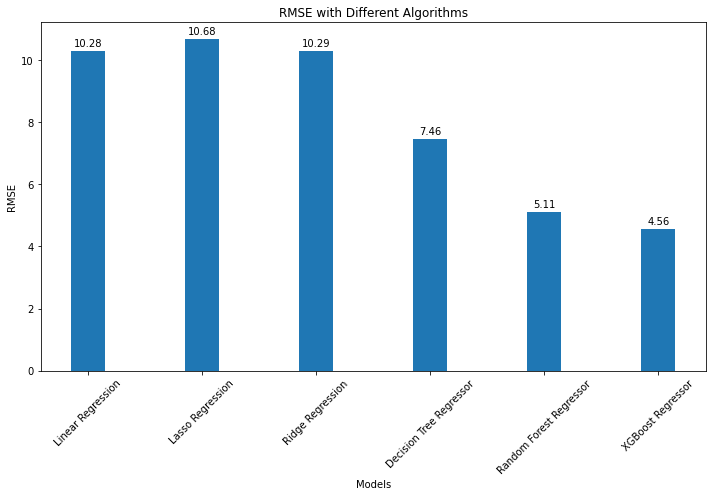

In [41]:
models = [lr, lasso, ridge, dtr, rfr , classifier]
names = ["Linear Regression", "Lasso Regression", "Ridge Regression", 
         "Decision Tree Regressor", "Random Forest Regressor" , "XGBoost Regressor"]
rmses = []

for model in models:
    rmses.append(np.sqrt(mean_squared_error(y_test, model.predict(X_test))))

x = np.arange(len(names)) 
width = 0.3

fig, ax = plt.subplots(figsize=(10,7))
rects = ax.bar(x, rmses, width)
ax.set_ylabel('RMSE')
ax.set_xlabel('Models')
ax.set_title('RMSE with Different Algorithms')
ax.set_xticks(x)
ax.set_xticklabels(names, rotation=45)
autolabel(rects)
fig.tight_layout()
plt.show()

# Feature Importance using Tree Based models

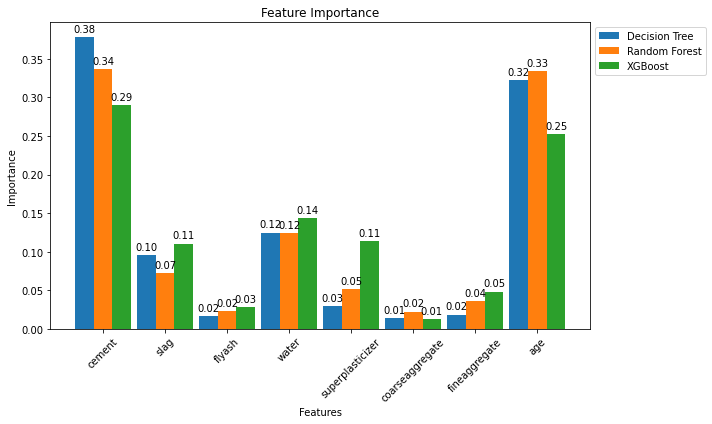

In [42]:
feature_dtr = dtr.feature_importances_
feature_rfr = rfr.feature_importances_
feature_classifier = classifier.feature_importances_

labels = data.columns[:-1]

x = np.arange(len(labels)) 
width = 0.3

fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(x-2*(width/2), feature_dtr, width, label='Decision Tree')
rects2 = ax.bar(x, feature_rfr, width, label='Random Forest')
rects3 = ax.bar(x+2*(width/2), feature_classifier, width, label='XGBoost')


ax.set_ylabel('Importance')
ax.set_xlabel('Features')
ax.set_title('Feature Importance')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend(loc="upper left", bbox_to_anchor=(1,1))

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
plt.show()

# ANN-

In [43]:
from keras import backend as K
def root_mean_squared_error(y_true , y_pred):
    return K.sqrt(K.mean(K.square(y_pred-y_true)))

In [44]:
# importing keras libraies and packages 
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU , PReLU , ELU
from keras.layers import Dropout

# Initializing ANN 
classify = Sequential()

# Adding the input layer and first hidden layer
# Weight initialization technique - he_uniform
# units = output dimension
classify.add(Dense( units =50 , kernel_initializer = 'he_uniform' , activation = 'relu', input_dim = 8))

# Adding the second hidden layer
classify.add(Dense(units =25 , kernel_initializer = 'he_uniform' , activation ='relu'))

# Adding third hidden layer 
classify.add(Dense(units = 50 , kernel_initializer = 'he_uniform' , activation ='relu'))

# Adding the output layer
classify.add(Dense(units =1 , kernel_initializer ='he_uniform'))

# Compiling the ANN
classify.compile(loss = root_mean_squared_error , optimizer = 'Adamax')
# Fitting the ANN to the training set
model_history =  classify.fit(X_train, y_train , validation_split=0.20 , batch_size = 10 , epochs = 1500)

 val_loss: 5.2325
Epoch 1307/1500
66/66 [==============================] - 0s 3ms/step - loss: 1.4490 - val_loss: 5.1955
Epoch 1308/1500
66/66 [==============================] - 0s 4ms/step - loss: 1.5292 - val_loss: 5.1875
Epoch 1309/1500
66/66 [==============================] - 0s 3ms/step - loss: 1.4890 - val_loss: 5.2378
Epoch 1310/1500
66/66 [==============================] - 0s 3ms/step - loss: 1.5469 - val_loss: 5.1709
Epoch 1311/1500
66/66 [==============================] - 0s 3ms/step - loss: 1.6153 - val_loss: 5.2372
Epoch 1312/1500
66/66 [==============================] - 0s 3ms/step - loss: 1.4828 - val_loss: 5.2119
Epoch 1313/1500
66/66 [==============================] - 0s 3ms/step - loss: 1.4580 - val_loss: 5.2598
Epoch 1314/1500
66/66 [==============================] - 0s 3ms/step - loss: 1.5846 - val_loss: 5.2863
Epoch 1315/1500
66/66 [==============================] - 0s 3ms/step - loss: 1.5416 - val_loss: 5.3703
Epoch 1316/1500
66/66 [==============================] 

In [45]:
y_pred_r = classify.predict(X_test)

In [46]:
print("Model\t\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""Random Forest Regressor \t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_r)),mean_squared_error(y_test, y_pred_r),
            mean_absolute_error(y_test, y_pred_r), r2_score(y_test, y_pred_r)))

Model				 RMSE 		 MSE 		 MAE 		 R2
Random Forest Regressor 	 5.91 		 34.99 		3.89 		0.86


# Comparision of RMSE values of all the algorithms

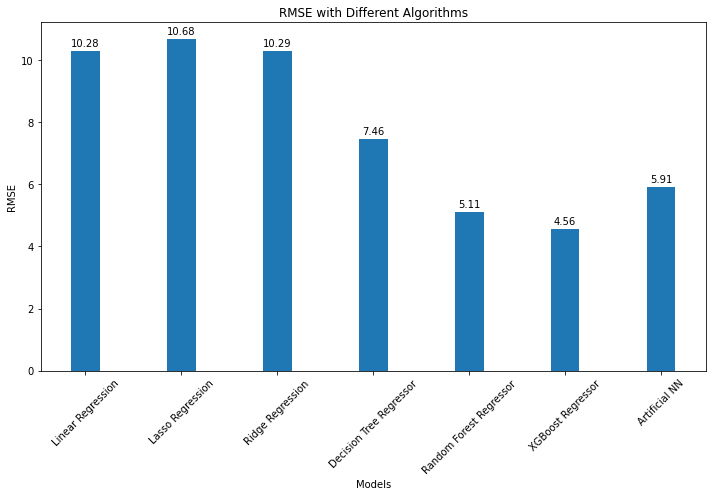

In [47]:
models = [lr, lasso, ridge, dtr, rfr , classifier  ,classify]
names = ["Linear Regression", "Lasso Regression", "Ridge Regression", 
         "Decision Tree Regressor", "Random Forest Regressor" , "XGBoost Regressor" ,  "Artificial NN"]
rmses = []

for model in models:
    rmses.append(np.sqrt(mean_squared_error(y_test, model.predict(X_test))))

x = np.arange(len(names)) 
width = 0.3

fig, ax = plt.subplots(figsize=(10,7))
rects = ax.bar(x, rmses, width)
ax.set_ylabel('RMSE')
ax.set_xlabel('Models')
ax.set_title('RMSE with Different Algorithms')
ax.set_xticks(x)
ax.set_xticklabels(names, rotation=45)
autolabel(rects)
fig.tight_layout()
plt.show()

# XGBoost is giving best result , so we are using that algorithm for our model

# Saving our model

In [48]:
import pickle
filename = 'finalized_model.pkl'
pickle.dump(classifier , open(filename , 'wb'))

In [49]:
from tensorflow.keras.models import load_model
classify.save('final_model.h5')


In [50]:
xgb_model_loaded = pickle.load(open(filename, "rb"))